In [26]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch import nn

### PyTorch Workflow
Lets explore an example of PyTorch end-to-end workflow
<br>

In [27]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

In [28]:
from torch import nn # nn contains building all of PyTorchs building blocks for neural networks
# check PyTorch Version



## Data (Preparing and Loading)
Data can be almost anything... in machine learning/
* Excel spreadsheet
* Images of any kind
* Videos
* Audio
* DNA
<br>
Machine Learning is a game of two parts"
1. Get data into numerical representation.
2. Build a model to learn patters in that numerical representations
<br>

In [29]:
# Create *know* parameters
weight = 0.7
bias = 0.3


# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets

In [30]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### How to better visualize data:

In [31]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,6))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot them if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={'size': 14})

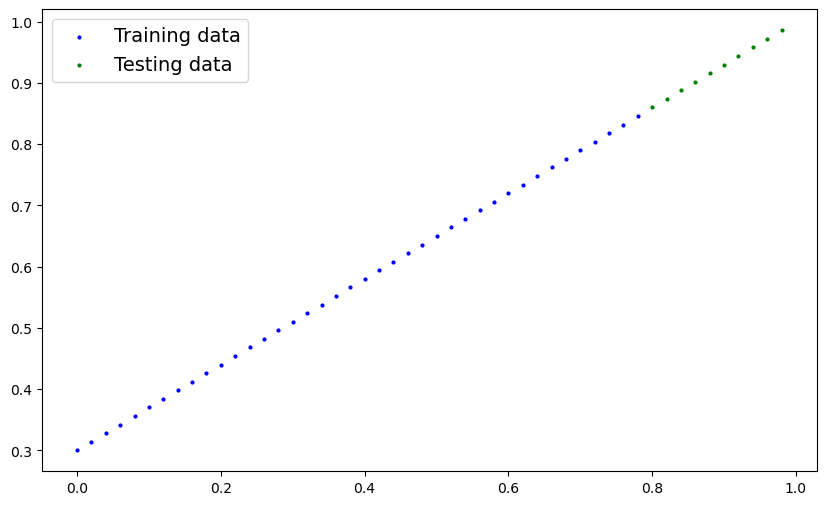

In [32]:
plot_predictions()

## 2. Build Model

In [45]:
class LinearRegressionModel(nn.Module): # <- almost everything in Pytorch inherits from nn.Module
    def __init__(self):
        super().__init__() #
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # "x" is the input data
        return self.weights * x + self.bias # linear regression formula



### PyTorch model building essentials
* torch.nn - contains all of the building blocks for computational graphs
* torch.nn.parameters - what parameters should our model try and learn, often a Pytorch layer from torch.nn will set these for us
* torch.nn.Module -  THe base class for all neural network modules, if you subclass it, you should overwrite forward
* torch.optim - this is where the optimizers live, they will help with gradient descent
* torch.util.data.dataset - Represents a map between key (label) and sample (features) pairs of the data. Such as images and their associated labels
* torch.util.data.dataloader - Creates a python iterable over a torch dataset
*  def forward()- ALl nnn.module subclasses require you to overwrite forward(),

In [46]:
# Checking the contents of our PyTorch model

# Create a random seed
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [47]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [48]:
weight, bias

(0.7, 0.3)

### Making predictions using 'torch.inference_mode()'
To check our model's predictive power, let's see how well it predicts 'y_test' base on 'x_test'
<br> When we pass data through our model, it's going to run through the 'forward()' method

In [49]:
# Make predictions with model
# Inference mode makes code faster, by not tracking grad.
# Same as .no_grad(), but with extra features.
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

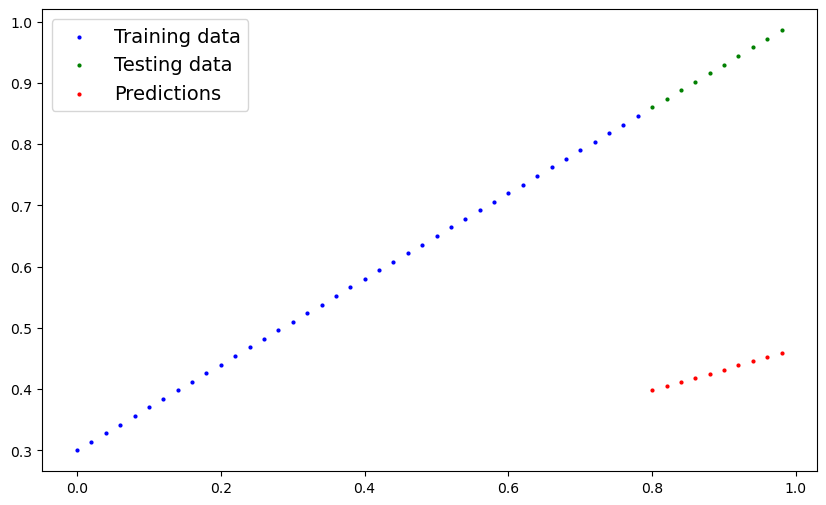

In [50]:
plot_predictions(predictions=y_preds)

## 3. Train model
<br> The whole idea of training is for a model to move from *unkown* parameters (these may be random) to soem *known* parameters
<br> Or in other words from a poor representation of the data to a better representation of the data
<br> One way to measure how poor or how wrong your models predictions are is to use a loss function
<br><br> Note: Loss Function may be also called cost function or criterion in different areas.
<br><br> Things we need to train: <br>
 <br>**Loss function:** A function to measure how wrong your model's predictions are to the ideas outputs, lower is better.
 <br> **Optimizer:** Takes into account the loss of  amodel and ajusts the model's parameters (e.g. weight and bias)
 <br> inside optimizers you'll often set two parameters:
 <br> * params- the model paraeters you'd like to optimize, for example "parmas=model_0.parameters()'
 <br> * lr (learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer chjanges the parameters with each step ( small lr results in small change, big lr big changes)
 <br><br> And specifically for PyTorch we need:
 <br> A training loop
 <br> A testing loop

In [52]:
# Check out parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [53]:
# Setup a loss function
loss_fn = nn.MSELoss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)


### Building a training loop (and testing loop) in PyTorch
<br> A couple of things we need in a training loop